In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('test.csv', sep=",")

In [3]:
print(df.dtypes)

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [5]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [6]:

df['Type of Travel'].unique()


array(['Business travel', 'Personal Travel'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:

df.Gender= df.Gender.map({'Female': 0, 'Male': 1})
df['Customer Type']=df['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer':1})
df['Type of Travel']=df['Type of Travel'].map({'Business travel': 0, 'Personal Travel':1})
df.Class=df.Class.map({'Eco': 0, 'Business':1,'No servicio tel':1})
df.satisfaction=df.satisfaction.map({'satisfied': 0, 'neutral or dissatisfied':1})


In [9]:
df.fillna(df.mean())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,0.0,160,5,4,...,5,5,5,5,2,5,5,50,44.0,0
1,1,90035,0,0,36,0,1.0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,0
2,2,12360,1,1,20,0,0.0,192,2,0,...,2,4,1,3,2,2,2,0,0.0,1
3,3,77959,1,0,44,0,1.0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,0
4,4,36875,0,0,49,0,0.0,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,34,0,1.0,526,3,3,...,4,3,2,4,4,5,4,0,0.0,1
25972,25972,71167,1,0,23,0,1.0,646,4,4,...,4,4,5,5,5,5,4,0,0.0,0
25973,25973,37675,0,0,17,1,0.0,828,2,5,...,2,4,3,4,5,4,2,0,0.0,1
25974,25974,90086,1,0,14,0,1.0,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,0


In [10]:
df=df.fillna(df.mean(),axis=0)

In [11]:
df.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000
mean,12987.500000,65005.657992,0.492917,0.184747,39.620958,0.305590,0.519348,1193.788459,2.724746,3.046812,...,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.561018
std,7498.769632,37611.526647,0.499959,0.388100,15.135685,0.460666,0.480846,998.683999,1.335384,1.533371,...,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.457549,0.496272
min,0.000000,17.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6493.750000,32170.500000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,12987.500000,65319.500000,0.000000,0.000000,40.000000,0.000000,0.519348,849.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,1.000000
75%,19481.250000,97584.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,25975.000000,129877.000000,1.000000,1.000000,85.000000,1.000000,1.000000,4983.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


In [12]:
df=df.drop('Unnamed: 0', axis=1)

In [13]:
df=df.drop('id', axis=1)

In [14]:
df.corr()
corr = round(df.corr(), 2)
corr.style.background_gradient()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.030000,0.010000,0.020000,-0.000000,-0.010000,-0.010000,0.010000,0.000000,-0.010000,-0.010000,-0.060000,-0.050000,-0.010000,-0.000000,0.030000,0.030000,0.000000,0.030000,-0.010000,0.010000,0.010000,-0.010000
Customer Type,-0.030000,1.000000,-0.290000,-0.310000,-0.110000,-0.230000,0.000000,-0.210000,-0.010000,-0.000000,-0.050000,-0.190000,-0.140000,-0.090000,-0.040000,-0.040000,0.030000,-0.030000,0.030000,-0.070000,0.000000,0.000000,0.180000
Age,0.010000,-0.290000,1.000000,-0.030000,0.140000,0.100000,0.010000,0.030000,0.010000,0.000000,0.020000,0.200000,0.150000,0.070000,0.050000,0.030000,-0.050000,0.030000,-0.060000,0.050000,-0.000000,-0.010000,-0.120000
Type of Travel,0.020000,-0.310000,-0.030000,1.000000,-0.550000,-0.260000,-0.110000,0.250000,-0.140000,-0.030000,-0.090000,-0.220000,-0.140000,-0.170000,-0.070000,-0.140000,-0.040000,0.010000,-0.030000,-0.110000,-0.010000,-0.010000,0.450000
Class,-0.000000,-0.110000,0.140000,-0.550000,1.000000,0.450000,0.040000,-0.080000,0.110000,0.010000,0.100000,0.320000,0.230000,0.200000,0.220000,0.210000,0.160000,0.150000,0.150000,0.150000,-0.010000,-0.020000,-0.490000
Flight Distance,-0.010000,-0.230000,0.100000,-0.260000,0.450000,1.000000,0.010000,-0.010000,0.060000,0.010000,0.060000,0.210000,0.160000,0.140000,0.120000,0.140000,0.070000,0.080000,0.070000,0.110000,0.000000,0.000000,-0.300000
Inflight wifi service,-0.010000,0.000000,0.010000,-0.110000,0.040000,0.010000,1.000000,0.350000,0.710000,0.350000,0.120000,0.460000,0.120000,0.200000,0.110000,0.160000,0.120000,0.050000,0.110000,0.130000,-0.010000,-0.010000,-0.280000
Departure/Arrival time convenient,0.010000,-0.210000,0.030000,0.250000,-0.080000,-0.010000,0.350000,1.000000,0.440000,0.460000,-0.020000,0.080000,-0.000000,-0.020000,0.060000,0.000000,0.070000,0.080000,0.070000,-0.010000,-0.000000,-0.000000,0.060000
Ease of Online booking,0.000000,-0.010000,0.010000,-0.140000,0.110000,0.060000,0.710000,0.440000,1.000000,0.470000,0.030000,0.410000,0.020000,0.040000,0.040000,0.120000,0.040000,-0.000000,0.040000,0.010000,-0.000000,-0.000000,-0.160000
Gate location,-0.010000,-0.000000,0.000000,-0.030000,0.010000,0.010000,0.350000,0.460000,0.470000,1.000000,-0.010000,0.010000,-0.000000,-0.000000,-0.030000,-0.000000,-0.000000,-0.050000,-0.010000,-0.010000,0.010000,0.010000,0.020000


# se crea los datos de df2 para el mayor score

In [15]:
  df2 = pd.DataFrame({
    'Inflight entertainment': df['Inflight entertainment'],
    'Cleanliness': df['Cleanliness']
})

In [16]:
df2.dtypes

Inflight entertainment    int64
Cleanliness               int64
dtype: object

In [17]:
df2

,Inflight entertainment,Cleanliness
0,5,5
1,4,5
2,2,2
3,1,4
4,2,4
...,...,...
25971,4,4
25972,4,4
25973,2,2
25974,4,4


In [18]:
numbers = range(1, 10)
kmeans = [KMeans(n_clusters=index) for index in numbers]
scores = [kmeans[index].fit(df2).score(df2) for index in range(len(kmeans))]

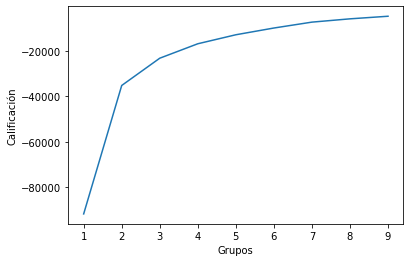

In [19]:

plt.plot(numbers, scores)
plt.xlabel("Grupos")
plt.ylabel("Calificación")
plt.show()

### nos apoyamos en la cantidad de centroides

In [20]:
clustering = KMeans(n_clusters=3)

In [21]:
clustering.fit(df2)

KMeans(n_clusters=3)

In [22]:
clustering.cluster_centers_

array([[4.47063737, 4.36905856],
       [1.59673879, 1.57369081],
       [3.08365019, 3.01874918]])

grafica de centroides

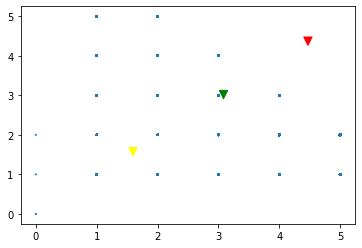

In [23]:
plt.scatter(df2.to_numpy()[:, 0], df2.to_numpy()[:, 1], clustering.labels_, marker='o')
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], c=['red', 'yellow', 'green'], marker='v', s=70)
plt.show()

In [30]:
 labels = ['vuelo con execelente salubirdad',   'vuelo no solubre', 'vuelo decente']

                                       entretenimiento y  limpieza
vuelo decente                          [3.08365019, 3.01874918],
vuelo con execelente salubirdad        [4.47063737, 4.36905856],
vuelo no solubre                       [1.59673879, 1.57369081]  

In [31]:
def get_label(model, earns, score):
    position = model.predict([[earns, score]])
    return labels[position[0]]

In [32]:
entretenimiento=4.47063737
limpieza=4.47063737

print(f"eso es un : {get_label(clustering, entretenimiento,limpieza )}")

eso es un : vuelo con execelente salubirdad
